# who survive?
In this notebook I use Decision Tree Classifier to classify if someone survive or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [25]:
test_df = pd.read_csv('in/titanic-test.csv')
train_df = pd.read_csv('in/titanic-train.csv')

In [7]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
374,1266,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S
72,964,3,"Nieminen, Miss. Manta Josefina",female,29.0,0,0,3101297,7.9250,NaN,S
202,1094,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C
373,1265,2,"Harbeck, Mr. William H",male,44.0,0,0,248746,13.0000,NaN,S
278,1170,2,"Ware, Mr. John James",male,30.0,1,0,CA 31352,21.0000,NaN,S


In [8]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


## What is sex passengers distribution?

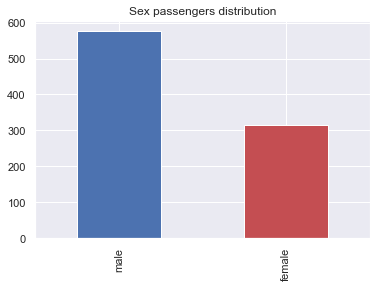

In [9]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Sex passengers distribution')
plt.show()

## Preprocessing

Encode sex values 

In [26]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
encoder_sex = label_encoder.fit_transform(train_df['Sex'])

fill null values on Age and Embarked

In [27]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

Select what columns are categorical and do not have more that 10 unique values

In [28]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
categorical_cols = [cname for cname in train_predictors.columns if
                        train_predictors[cname].nunique() < 10 and
                        train_predictors[cname].dtype == 'object'                 
                   ]

In [39]:
categorical_cols

['Sex', 'Embarked']

Select what columns are numerical

In [31]:
numerical_cols = [cname for cname in train_predictors.columns if
                   train_predictors[cname].dtype in ['int64', 'float64']
                 ]

In [40]:
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [32]:
my_cols = categorical_cols + numerical_cols

train_predictors = train_predictors[my_cols]

In [33]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [41]:
dummy_encoded_train_predictors.sample(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
71,3,16.0,5,2,46.900,1,0,0,0,1
541,3,9.0,4,2,31.275,1,0,0,0,1
270,1,28.0,0,0,31.000,0,1,0,0,1
647,1,56.0,0,0,35.500,0,1,1,0,0
673,2,31.0,0,0,13.000,0,1,0,0,1


## train starting 

In [35]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values

In [18]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size = .25, random_state = 1)

In [42]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [44]:
tree_one_accuracy = round(tree_one.score(x_validation, y_validation), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.7578


In [ ]:
from io import StringIO 
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')